In [285]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import neighbors
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from logistic_regression import CustomeLogisticRegression
from sklearn.metrics import roc_curve, auc,roc_auc_score


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Text(0.5, 1.0, 'ROC Curve')

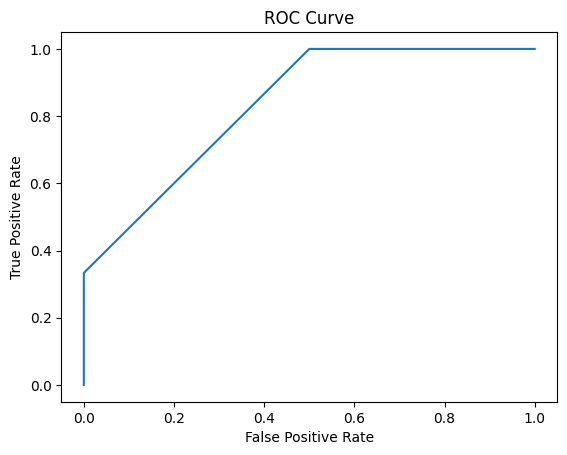

In [308]:
q5 = [[0,0], [1/3, 0], [2/3, 1/4], [1, 1/2], [1, 1]]
df_q5 = pd.DataFrame(q5, columns= ['TPR', 'FPR'])
fig, ax = plt.subplots()

ax.plot(df_q5['FPR'], df_q5['TPR'])
ax.set_xlabel("False Positive Rate")
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')


In [287]:
D2z = pd.read_csv('data/D2z.txt', names= ["x1", "x2", "y"], sep = ' ')
D2z.head()

,x1,x2,y
0,-0.333338,-0.087171,0
1,-1.531730,0.358194,1
2,1.549590,-0.364050,0
3,-1.349910,0.252063,1
4,1.283850,-0.531146,0


In [288]:
X = D2z.drop('y', axis = 1)
X.values
Y = D2z['y']
Y.values

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0], dtype=int64)

In [289]:
s = np.arange(-20, 21)/10
distances_list = []
k = 0
for i in s:
    for j in s:
       new_point = np.array([i, j])
       distances = np.linalg.norm(X - new_point, axis = 1)
       distances_min = distances.argsort()[k]
       y_distances_min = Y[distances_min]
       distances_list.append([i, j, y_distances_min])

distances_list = pd.DataFrame(distances_list, columns= ['x1', 'x2', 'y'])


In [290]:
D2z['y'] == 0

0       True
1      False
2       True
3      False
4       True
       ...  
195    False
196     True
197    False
198    False
199     True
Name: y, Length: 200, dtype: bool

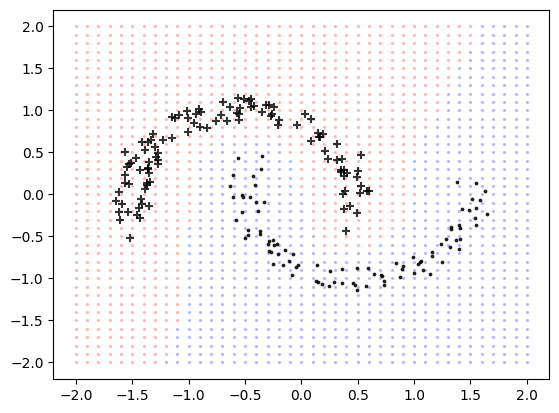

In [291]:
group1 = distances_list[distances_list['y'] == 1]
group2 = distances_list[distances_list['y'] == 0]
group1_train = D2z[D2z['y'] == 1] 
group2_train = D2z[D2z['y'] == 0] 
fig, ax = plt.subplots()

ax.scatter(group1['x1'], group1['x2'], color = 'red', alpha= 0.2, s = 2)
ax.scatter(group2['x1'], group2['x2'], color = 'blue', alpha= 0.2, s = 2)
ax.scatter(group1_train['x1'], group1_train['x2'], color = 'black', marker= '+', alpha=0.8)
ax.scatter(group2_train['x1'], group2_train['x2'], color = 'black', marker= 'o', alpha = 0.8, s = 3)

plt.show()

In [292]:
df_email = pd.read_csv('data/emails.csv')

In [293]:
#fold1
fold1_train = df_email[1000:]
X_fold1 = fold1_train.drop(['Email No.', 'Prediction'], axis = 1).apply(pd.to_numeric, axis = 1).reset_index()
X_fold1 = X_fold1.drop('level_0', axis = 1)
Y_fold1 = fold1_train['Prediction'].reset_index()

fold1_test = df_email[0:1000]
x_test_fold1 = fold1_test.drop(['Email No.', 'Prediction'], axis = 1).apply(pd.to_numeric, axis = 1)
y_actual_fold1 = fold1_test['Prediction']

#fold2
fold2_train = df_email.drop(index= range(999, 2000))
X_fold2 = fold2_train.drop(['Email No.', 'Prediction'], axis=1).apply(pd.to_numeric, axis = 1).reset_index()
X_fold2 = X_fold2.drop('level_0', axis = 1)
Y_fold2 = fold2_train['Prediction'].reset_index()

fold2_test = df_email[999:2000]
x_test_fold2 = fold2_test.drop(['Email No.', 'Prediction'], axis = 1).apply(pd.to_numeric, axis = 1)
x_test_fold2 = x_test_fold2.reset_index().drop('level_0', axis = 1)
y_actual_fold2 = fold2_test['Prediction']
y_actual_fold2 = y_actual_fold2.reset_index()['Prediction']

#fold3
fold3_train = df_email.drop(index= range(1999, 3000))
X_fold3 = fold3_train.drop(['Email No.', 'Prediction'], axis=1).apply(pd.to_numeric, axis = 1).reset_index()
X_fold3 = X_fold3.drop('level_0', axis = 1)
Y_fold3 = fold3_train['Prediction'].reset_index()

fold3_test = df_email[1999:3000]
x_test_fold3 = fold3_test.drop(['Email No.', 'Prediction'], axis = 1).apply(pd.to_numeric, axis = 1)
x_test_fold3 = x_test_fold3.reset_index().drop('level_0', axis = 1)
y_actual_fold3 = fold3_test['Prediction']
y_actual_fold3 = y_actual_fold3.reset_index()['Prediction']

#fold4
fold4_train = df_email.drop(index= range(2999, 4000))
X_fold4 = fold4_train.drop(['Email No.', 'Prediction'], axis=1).apply(pd.to_numeric, axis = 1).reset_index()
X_fold4 = X_fold4.drop('level_0', axis = 1)
Y_fold4 = fold4_train['Prediction'].reset_index()

fold4_test = df_email[2999:4000]
x_test_fold4 = fold4_test.drop(['Email No.', 'Prediction'], axis = 1).apply(pd.to_numeric, axis = 1)
x_test_fold4 = x_test_fold4.reset_index().drop('level_0', axis = 1)
y_actual_fold4 = fold4_test['Prediction']
y_actual_fold4 = y_actual_fold4.reset_index()['Prediction']

#fold5
fold5_train = df_email.drop(index= range(3999, 5000))
X_fold5 = fold5_train.drop(['Email No.', 'Prediction'], axis=1).apply(pd.to_numeric, axis = 1).reset_index()
X_fold5 = X_fold5.drop('level_0', axis = 1)
Y_fold5 = fold5_train['Prediction'].reset_index()

fold5_test = df_email[3999:5000]
x_test_fold5 = fold5_test.drop(['Email No.', 'Prediction'], axis = 1).apply(pd.to_numeric, axis = 1)
x_test_fold5 = x_test_fold5.reset_index().drop('level_0', axis = 1)
y_actual_fold5 = fold5_test['Prediction']
y_actual_fold5 = y_actual_fold5.reset_index()['Prediction']

# result
res = []


# Sklearn Knn

In [294]:
def accuracy(actual, pred):
    TP, TN, FP, FN = 0, 0, 0, 0
    for i in range(len(actual)):
        if actual[i] == 0 and pred[i][1] == 0:
            TN = TN + 1
        elif actual[i] == 0 and pred[i][1] == 1:
            FN = FN + 1
        elif  actual[i] == 1 and pred[i][1] == 1:
            TP = TP + 1
        else:
            FP = FP + 1
    Accuracy = (TP + TN) / (TP + TN + FN + FP)
    Precision = TP/(TP + FP)
    Recall = TP/(TP + FN)
    return Accuracy, Precision, Recall

In [295]:
clf = neighbors.KNeighborsClassifier(n_neighbors= 1, p = 2)
clf.fit(X_fold1, Y_fold1)
y_pred = clf.predict(x_test_fold1)

evaluation = []

Accuracy, Precision, Recall = accuracy(y_actual_fold1, y_pred)
evaluation.append(['Fold 1', Accuracy, Precision, Recall])

In [296]:
evaluation = []
clf = neighbors.KNeighborsClassifier(n_neighbors= 1, p = 2)

clf.fit(X_fold1, Y_fold1)
y_pred = clf.predict(x_test_fold1)
Accuracy, Precision, Recall = accuracy(y_actual_fold1, y_pred)
evaluation.append(['Fold 1', Accuracy, Precision, Recall])

clf.fit(X_fold2, Y_fold2)
y_pred = clf.predict(x_test_fold2)
Accuracy, Precision, Recall = accuracy(y_actual_fold2, y_pred)
evaluation.append(['Fold 2', Accuracy, Precision, Recall])

clf.fit(X_fold3, Y_fold3)
y_pred = clf.predict(x_test_fold3)
Accuracy, Precision, Recall = accuracy(y_actual_fold3, y_pred)
evaluation.append(['Fold 3', Accuracy, Precision, Recall])

clf.fit(X_fold4, Y_fold4)
y_pred = clf.predict(x_test_fold4)
Accuracy, Precision, Recall = accuracy(y_actual_fold4, y_pred)
evaluation.append(['Fold 4', Accuracy, Precision, Recall])

clf.fit(X_fold5, Y_fold5)
y_pred = clf.predict(x_test_fold5)
Accuracy, Precision, Recall = accuracy(y_actual_fold5, y_pred)
evaluation.append(['Fold 5', Accuracy, Precision, Recall])

In [297]:
evaluation = pd.DataFrame(evaluation, columns= ['Fold', 'Accuracy', 'Precision', 'Recall'])
evaluation

,Fold,Accuracy,Precision,Recall
0,Fold 1,0.825000,0.817544,0.654494
1,Fold 2,0.852148,0.866426,0.683761
2,Fold 3,0.861139,0.835088,0.721212
3,Fold 4,0.851149,0.816327,0.716418
4,Fold 5,0.775225,0.758170,0.605744


In [298]:
mean_accuracy = []
mean_accuracy.append([1, np.mean(evaluation['Accuracy'])])

In [299]:
for i in [3,5,7,10]:
    evaluation = []
    clf = neighbors.KNeighborsClassifier(n_neighbors= i, p = 2)

    clf.fit(X_fold1, Y_fold1)
    y_pred = clf.predict(x_test_fold1)
    Accuracy, Precision, Recall = accuracy(y_actual_fold1, y_pred)
    evaluation.append(Accuracy)

    clf.fit(X_fold2, Y_fold2)
    y_pred = clf.predict(x_test_fold2)
    Accuracy, Precision, Recall = accuracy(y_actual_fold2, y_pred)
    evaluation.append(Accuracy)

    clf.fit(X_fold3, Y_fold3)
    y_pred = clf.predict(x_test_fold3)
    Accuracy, Precision, Recall = accuracy(y_actual_fold3, y_pred)
    evaluation.append(Accuracy)

    clf.fit(X_fold4, Y_fold4)
    y_pred = clf.predict(x_test_fold4)
    Accuracy, Precision, Recall = accuracy(y_actual_fold4, y_pred)
    evaluation.append(Accuracy)

    clf.fit(X_fold5, Y_fold5)
    y_pred = clf.predict(x_test_fold5)
    Accuracy, Precision, Recall = accuracy(y_actual_fold5, y_pred)
    evaluation.append(Accuracy)

    mean_accuracy.append([i, np.mean(evaluation)])


In [300]:
mean_accuracy = pd.DataFrame(mean_accuracy, columns= ['k', 'Accuracy'])
mean_accuracy

,k,Accuracy
0,1,0.832932
1,3,0.841728
2,5,0.840527
3,7,0.846122
4,10,0.855117


Text(0.5, 1.0, 'kNN 5-Fold Cross validation')

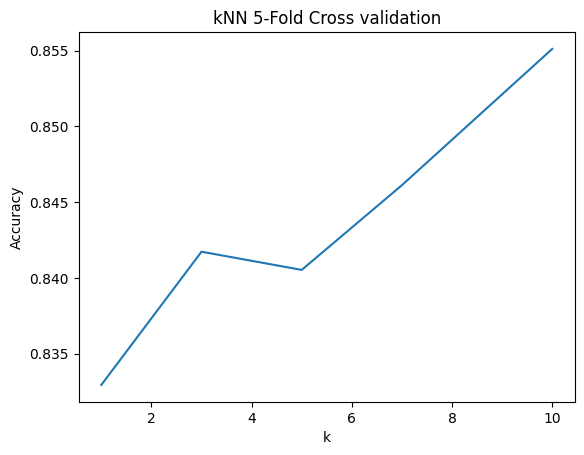

In [301]:
fig, ax = plt.subplots()

ax.plot(mean_accuracy['k'], mean_accuracy['Accuracy'])
ax.set_xlabel('k')
ax.set_ylabel('Accuracy')
ax.set_title('kNN 5-Fold Cross validation')

In [302]:
fold5_train = df_email.loc[:3999]
X_fold5 = fold5_train.drop(['Email No.', 'Prediction'], axis=1)
Y_fold5 = fold5_train['Prediction']
fold5_test = df_email.loc[4000:4999]
x_test_fold5 = fold5_test.drop(['Email No.', 'Prediction'], axis=1)
y_actual_fold5 = fold5_test['Prediction']


In [303]:
clf = neighbors.KNeighborsClassifier(n_neighbors= 5, p = 2)
clf.fit(X_fold5, Y_fold5)
y_prob = clf.predict_proba(x_test_fold5)[:, 1] # is a list of predicted probabilities (i.e., the probability that the sample belongs to the positive class)
fpr, tpr, threshold = roc_curve(y_actual_fold5, y_prob)
roc_auc = auc(fpr, tpr)
roc_auc_score(y_actual_fold5, y_prob)

0.846393456518054

# Logistics Regression

In [304]:
df_email = pd.read_csv('data/emails.csv')

#fold1
fold1_train = df_email[1000:]
X_fold1 = fold1_train.drop(['Email No.', 'Prediction'], axis = 1).apply(pd.to_numeric, axis = 1)
Y_fold1 = fold1_train['Prediction']

fold1_test = df_email[0:1000]
x_test_fold1 = fold1_test.drop(['Email No.', 'Prediction'], axis = 1).apply(pd.to_numeric, axis = 1)
y_actual_fold1 = fold1_test['Prediction']

#fold2
fold2_train = df_email.drop(index= range(999, 2000))
X_fold2 = fold2_train.drop(['Email No.', 'Prediction'], axis=1).apply(pd.to_numeric, axis = 1)
Y_fold2 = fold2_train['Prediction']

fold2_test = df_email[999:2000]
x_test_fold2 = fold2_test.drop(['Email No.', 'Prediction'], axis = 1).apply(pd.to_numeric, axis = 1)
y_actual_fold2 = fold2_test['Prediction']

#fold3
fold3_train = df_email.drop(index= range(1999, 3000))
X_fold3 = fold3_train.drop(['Email No.', 'Prediction'], axis=1).apply(pd.to_numeric, axis = 1)
Y_fold3 = fold3_train['Prediction']

fold3_test = df_email[1999:3000]
x_test_fold3 = fold3_test.drop(['Email No.', 'Prediction'], axis = 1).apply(pd.to_numeric, axis = 1)
y_actual_fold3 = fold3_test['Prediction']

#fold4
fold4_train = df_email.drop(index= range(2999, 4000))
X_fold4 = fold4_train.drop(['Email No.', 'Prediction'], axis=1).apply(pd.to_numeric, axis = 1)
Y_fold4 = fold4_train['Prediction']

fold4_test = df_email[2999:4000]
x_test_fold4 = fold4_test.drop(['Email No.', 'Prediction'], axis = 1).apply(pd.to_numeric, axis = 1)
y_actual_fold4 = fold4_test['Prediction']

#fold5
fold5_train = df_email.drop(index= range(3999, 5000))
X_fold5 = fold5_train.drop(['Email No.', 'Prediction'], axis=1).apply(pd.to_numeric, axis = 1)
Y_fold5 = fold5_train['Prediction']

fold5_test = df_email[3999:5000]
x_test_fold5 = fold5_test.drop(['Email No.', 'Prediction'], axis = 1).apply(pd.to_numeric, axis = 1)
y_actual_fold5 = fold5_test['Prediction']

# result
res = []

In [305]:
lr = CustomeLogisticRegression(learning_rate= 0.005)
epoch = 750
metrics = []

In [306]:
lr.fit(X_fold1, Y_fold1, epoch)
pred = lr.predict(x_test_fold1)
accuracy = accuracy_score(pred,y_actual_fold1)
recall = recall_score(pred,y_actual_fold1)
prec = precision_score(pred,y_actual_fold1)
metrics.append([accuracy, recall, prec])

lr.fit(X_fold2, Y_fold2, epoch)
pred = lr.predict(x_test_fold2)
accuracy = accuracy_score(pred,y_actual_fold2)
recall = recall_score(pred,y_actual_fold2)
prec = precision_score(pred,y_actual_fold2)
metrics.append([accuracy, recall, prec])

lr.fit(X_fold3, Y_fold3, epoch)
pred = lr.predict(x_test_fold3)
accuracy = accuracy_score(pred,y_actual_fold3)
recall = recall_score(pred,y_actual_fold3)
prec = precision_score(pred,y_actual_fold3)
metrics.append([accuracy, recall, prec])

lr.fit(X_fold4, Y_fold4, epoch)
pred = lr.predict(x_test_fold4)
accuracy = accuracy_score(pred,y_actual_fold4)
recall = recall_score(pred,y_actual_fold4)
prec = precision_score(pred,y_actual_fold4)
metrics.append([accuracy, recall, prec])

lr.fit(X_fold5, Y_fold5, epoch)
pred = lr.predict(x_test_fold5)
accuracy = accuracy_score(pred,y_actual_fold5)
recall = recall_score(pred,y_actual_fold5)
prec = precision_score(pred,y_actual_fold5)
metrics.append([accuracy, recall, prec])

metrics

[[0.893, 0.9120370370370371, 0.6912280701754386],
 [0.8851148851148851, 0.8347107438016529, 0.7292418772563177],
 [0.8691308691308691, 0.7436708860759493, 0.8245614035087719],
 [0.8771228771228772, 0.8131868131868132, 0.7551020408163265],
 [0.8401598401598401, 0.7027777777777777, 0.826797385620915]]

Text(0, 0.5, 'True Positive Rate (Positive Rate: 1)')

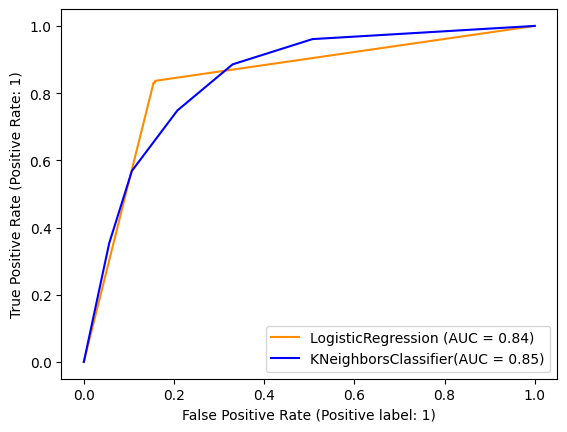

In [307]:
y_prob_lr = lr.predict_proba_lr(x_test_fold5)[:, 1] #get the second column
# first argument to roc_curve should be the true labels (i.e., y_actual_fold5) 
# and the second argument should be the predicted probabilities (i.e., y_prob)
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_actual_fold5, y_prob_lr)
roc_auc_lr = auc(lr_fpr, lr_tpr)
plt.plot(lr_fpr, lr_tpr, color = 'darkorange', label = 'LogisticRegression (AUC = {:.2f})'.format(roc_auc_lr))
plt.plot(fpr, tpr, color = 'blue', label = 'KNeighborsClassifier(AUC = {:.2f})'.format(roc_auc))
plt.legend()
plt.xlabel('False Positive Rate (Positive label: 1)')
plt.ylabel('True Positive Rate (Positive Rate: 1)')
#plt.plot([0,1], [1, 0], color = 'navy', linestyle = '--')


End